In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
caract = pd.read_csv('dataset-characterization.csv')
caract = caract.drop(columns=['depressive', 'Unnamed: 0'])
caract.head()

,text,repostCount,replyCount,likeCount,link,image,createdAt
0,you are worthy even if you:\n\nare battling de...,3,1,5,0,1,2024-10-12T21:52:30.121Z
1,Well dunno really \nJust saw them posting suic...,0,1,0,0,0,2023-09-03T03:07:41.109Z
2,There was a claim — maybe a rumor — that three...,60,41,1061,0,0,2024-11-08T19:21:39.224Z
3,#SuicidePrevention #Depression #Anxiety #Bully...,0,0,0,1,0,2022-03-16T13:10:05Z
4,ah shit damn guess i should have just been kil...,0,2,10,0,0,2024-09-06T22:19:19.694Z


In [4]:
!pip install emoji

  Using cached emoji-2.14.1-py3-none-any.whl.metadata (5.7 kB)
Using cached emoji-2.14.1-py3-none-any.whl (590 kB)


In [5]:
import emoji

def remove_emojis(text):
    return emoji.replace_emoji(text, replace='') if isinstance(text, str) else text

caract['text'] = caract['text'].apply(remove_emojis)

In [6]:
caract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15398 entries, 0 to 15397
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   text         15398 non-null  object
 1   repostCount  15398 non-null  int64 
 2   replyCount   15398 non-null  int64 
 3   likeCount    15398 non-null  int64 
 4   link         15398 non-null  int64 
 5   image        15398 non-null  int64 
 6   createdAt    15398 non-null  object
dtypes: int64(5), object(2)
memory usage: 842.2+ KB


In [7]:
dataset_final = pd.read_csv('dataset/dataset_final_3003.csv')
dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        4898 non-null   object
 1   depressive  4898 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 76.7+ KB


In [8]:
df = caract.merge(dataset_final, on='text', how='right')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4568 entries, 0 to 4893
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   text         4568 non-null   object 
 1   repostCount  4568 non-null   float64
 2   replyCount   4568 non-null   float64
 3   likeCount    4568 non-null   float64
 4   link         4568 non-null   float64
 5   image        4568 non-null   float64
 6   createdAt    4568 non-null   object 
 7   depressive   4568 non-null   int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 321.2+ KB


In [9]:
df['createdAt'] = df['createdAt'].astype('str')

def day_hour(row):
    if '.' in row:
        row = row.split('.', 1)[0]
    elif '+' in row:
        row = row.split('+', 1)[0]
    return pd.to_datetime(row) 

df['createdAt'] = df['createdAt'].apply(day_hour)

In [10]:
df.head()

,text,repostCount,replyCount,likeCount,link,image,createdAt,depressive
0,you are worthy even if you:\n\nare battling de...,3.0,1.0,5.0,0.0,1.0,2024-10-12 21:52:30,0
1,Well dunno really \nJust saw them posting suic...,0.0,1.0,0.0,0.0,0.0,2023-09-03 03:07:41,0
2,There was a claim — maybe a rumor — that three...,60.0,41.0,1061.0,0.0,0.0,2024-11-08 19:21:39,0
3,#SuicidePrevention #Depression #Anxiety #Bully...,0.0,0.0,0.0,1.0,0.0,2022-03-16 13:10:05+00:00,0
4,"Acceptance has been so key for me. At times, I...",0.0,0.0,0.0,0.0,0.0,2024-08-16 20:06:58,0


/tmp/ipykernel_466616/3714583062.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = df.groupby(['faixa', 'depressive']).size().unstack(fill_value=0)


<Figure size 1200x400 with 0 Axes>

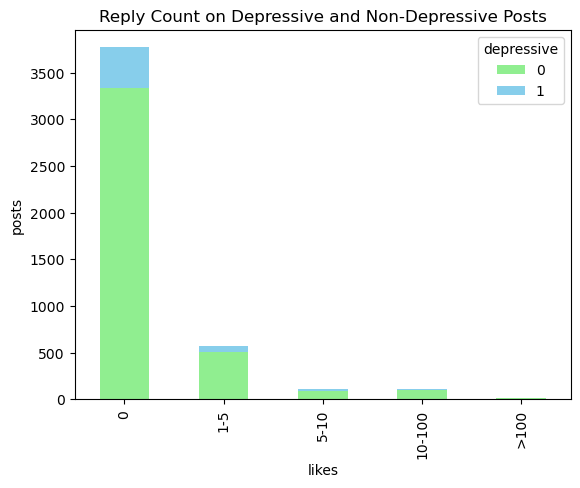

In [11]:
bins = [0, 1, 5, 10, 100, 4000]
labels = ['0', '1-5', '5-10', '10-100', '>100'] 
df['faixa'] = pd.cut(df['replyCount'], bins=bins, labels=labels, include_lowest=True)

contagem = df.groupby(['faixa', 'depressive']).size().unstack(fill_value=0)
plt.figure(figsize=(12,4))

contagem.plot(kind='bar', stacked=True, color=['lightgreen', 'skyblue'])

plt.title('Reply Count on Depressive and Non-Depressive Posts')
plt.ylabel('posts')
plt.xlabel('likes')
plt.show()

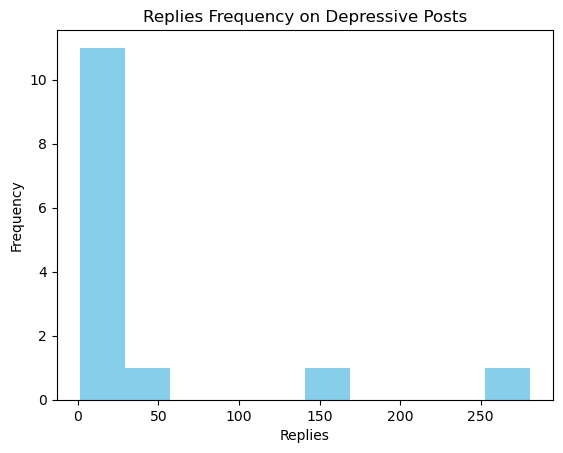

In [12]:
depressives = df.loc[df['depressive']==1]

depressives['replyCount'].value_counts().plot(kind='hist', bins=10, color='skyblue')
plt.title('Replies Frequency on Depressive Posts')
plt.xlabel('Replies')
plt.show()

/tmp/ipykernel_466616/3986756798.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contagem = df.groupby(['faixa', 'depressive']).size().unstack(fill_value=0)


<Figure size 1200x400 with 0 Axes>

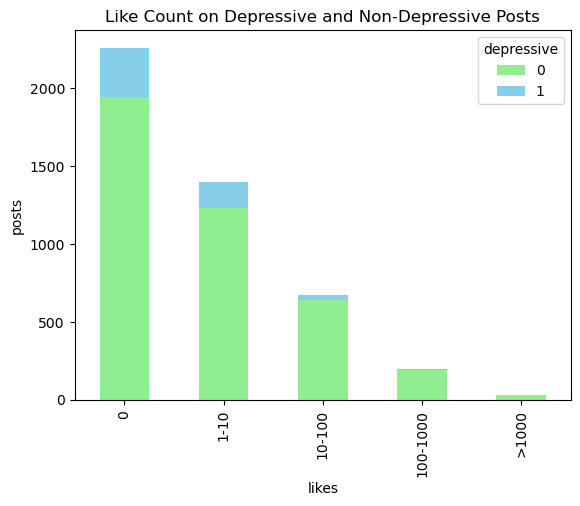

In [13]:
bins = [0, 1, 10, 100, 1000, 10000]
labels = ['0', '1-10', '10-100', '100-1000', '>1000'] 
df['faixa'] = pd.cut(df['likeCount'], bins=bins, labels=labels, include_lowest=True)

contagem = df.groupby(['faixa', 'depressive']).size().unstack(fill_value=0)
plt.figure(figsize=(12,4))
contagem.plot(kind='bar', stacked=True, color=['lightgreen', 'skyblue'])

plt.title('Like Count on Depressive and Non-Depressive Posts')
plt.ylabel('posts')
plt.xlabel('likes')
plt.show()

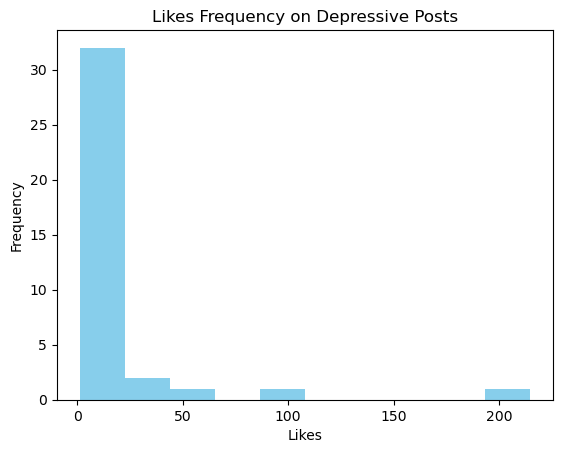

In [14]:
depressives['likeCount'].value_counts().plot(kind='hist', bins=10, color='skyblue')
plt.title('Likes Frequency on Depressive Posts')
plt.xlabel('Likes')
plt.show()


In [15]:
df.head()

,text,repostCount,replyCount,likeCount,link,image,createdAt,depressive,faixa
0,you are worthy even if you:\n\nare battling de...,3.0,1.0,5.0,0.0,1.0,2024-10-12 21:52:30,0,1-10
1,Well dunno really \nJust saw them posting suic...,0.0,1.0,0.0,0.0,0.0,2023-09-03 03:07:41,0,0
2,There was a claim — maybe a rumor — that three...,60.0,41.0,1061.0,0.0,0.0,2024-11-08 19:21:39,0,>1000
3,#SuicidePrevention #Depression #Anxiety #Bully...,0.0,0.0,0.0,1.0,0.0,2022-03-16 13:10:05+00:00,0,0
4,"Acceptance has been so key for me. At times, I...",0.0,0.0,0.0,0.0,0.0,2024-08-16 20:06:58,0,0


/tmp/ipykernel_466616/3713996607.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depressives['createdAt'] = pd.to_datetime(depressives['createdAt'], utc=True).dt.tz_convert(None)
/tmp/ipykernel_466616/3713996607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  depressives.loc[:, 'hour'] = depressives['createdAt'].dt.hour


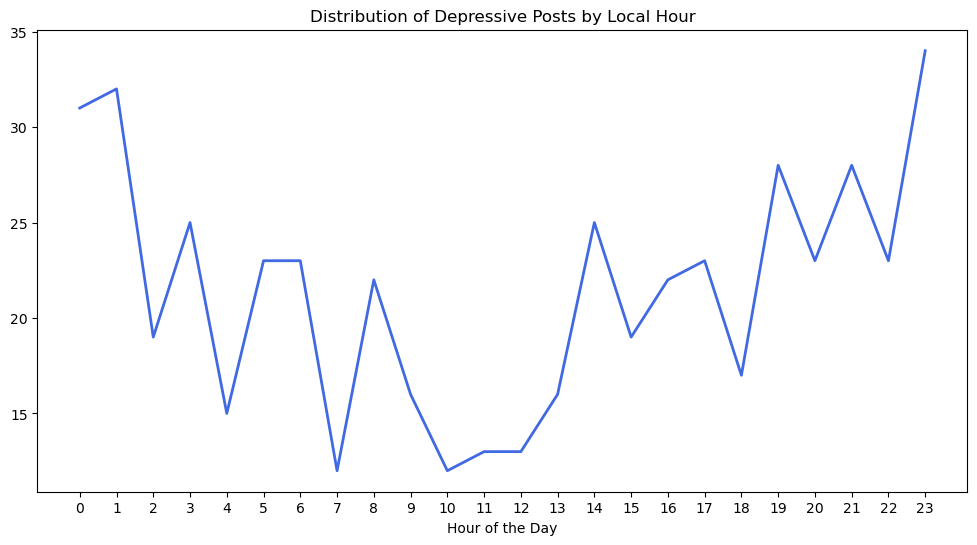

In [16]:
depressives['createdAt'] = pd.to_datetime(depressives['createdAt'], utc=True).dt.tz_convert(None)


depressives.loc[:, 'hour'] = depressives['createdAt'].dt.hour

plt.figure(figsize=(12,6))
hourly_counts = depressives['hour'].value_counts().sort_index()
plt.plot(hourly_counts.index, hourly_counts.values, linestyle='-', color='royalblue', lw=2)
plt.title('Distribution of Depressive Posts by Local Hour')
plt.xlabel('Hour of the Day')
plt.xticks(range(24))
plt.show()

In [17]:
!pip install wordcloud 

In [34]:
!pip install image

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 25.2 MB/s eta 0:00:00a 0:00:01
  Created wheel for image: filename=image-1.5.33-py2.py3-none-any.whl size=19482 sha256=e0ca6b8c0b0a0992a131949bf04d237f56de3f8798d7ac04e9507b062c2e1b01
  Stored in directory: /home/grad/si/22/aliciachaves/.cache/pip/wheels/70/0c/a4/7cfa53a5c6225c2db2bfec08e782b43d0f25fdae2e995b69be
Successfully built image


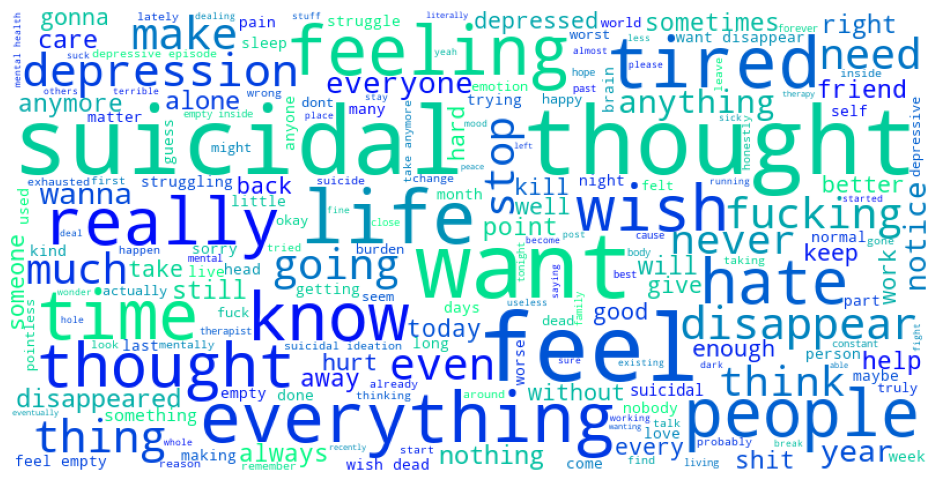

In [54]:
from wordcloud import WordCloud
from PIL import Image

mask = np.array(Image.open('cloud.png'))

text = ' '.join(depressives['text'])

wordcloud = WordCloud(
    width=800, 
    height=400, 
    background_color='white', 
    colormap='winter', 
    min_word_length=4, 
    mask=mask, 
    contour_width=1, 
    contour_color='black'
).generate(text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()